In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split = 0.2)

loss, acc = ann.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", acc)

Epoch 1/10
40/40 [==============================] - 2s 22ms/step - loss: 0.1826 - accuracy: 0.7218 - val_loss: 0.1705 - val_accuracy: 0.8056
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.8299 - val_loss: 0.1529 - val_accuracy: 0.8683
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.1462 - accuracy: 0.8534 - val_loss: 0.1384 - val_accuracy: 0.8683
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 0.1324 - accuracy: 0.8574 - val_loss: 0.1255 - val_accuracy: 0.8715
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1201 - accuracy: 0.8683 - val_loss: 0.1138 - val_accuracy: 0.8809
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.1088 - accuracy: 0.8793 - val_loss: 0.1032 - val_accuracy: 0.8934
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0986 - accuracy: 0.8950 - val_loss: 0.0936 - val_accuracy: 0.8997
Epoch 8/10
40/40 [=

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [4]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [5]:
print("Classification report for classifier %s:\n%s\n" % (
    ann, classification_report(y_test, y_pred)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f8b1e182ad0>:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       346
           1       0.91      0.55      0.68        53

    accuracy                           0.93       399
   macro avg       0.92      0.77      0.82       399
weighted avg       0.93      0.93      0.92       399




In [6]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[343   3]
 [ 24  29]]

Model accuracy:  0.9323308270676691


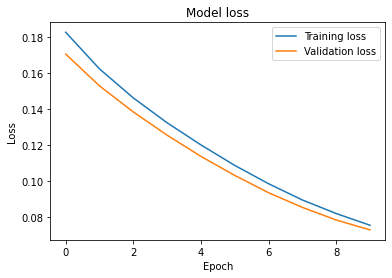

In [7]:
################### Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

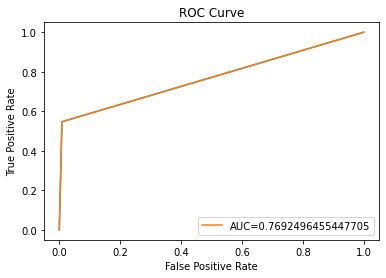

In [8]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/ANN_Numeric_Before.model"
pickle.dump(ann, open(fileName, 'wb'))

INFO:tensorflow:Assets written to: ram://a0fdeba1-3b25-48ea-9726-ca88be49237b/assets
